Scalable Databases Mid-Term Project : Online Book Recommendation Dataset

In [126]:
import numpy as np
import os
import csv
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
import sqlite3

# Path to the database file
db_path = "/content/Book_keeping.db"

# Connect to the database
connection = sqlite3.connect(db_path)
cursor = connection.execute('''SELECT * FROM book_details;''')
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(0, 1, 'Hunger games', 'Young Adult', '11- 13', '9780545229937')
(2, 3, 'To Kill a Mockingbird', 'Young Adult ', '12-18', '9780060888695')
(3, 4, 'Six of Crows', 'Fantasy', '13 and above', '9783426443798')
(4, 5, 'Eragon', 'Fantasy', '13 and above', '9781400090686')
(5, 6, 'Legend', 'Young Adult', '13 and above', '8601419658442')
(6, 7, 'Sun is also a star', 'Teen Romance', '12 and above', '9788580416596')
(7, 8, 'The Silkworm', 'Crime Fiction', '15 and above', '9783641145958')
(8, 9, 'The Final Six', 'Science Fiction', '14 and above', '9781538498132')
(9, 10, 'Carve the Mark', 'Young Adult', '14 and above', '9788579803314')
(10, 11, 'Pet Sematary', 'Horror', '15 and above', '9780743518444')
(11, 12, 'The House Of Hades', 'Young Adult', '9 - 16', '9788711347089')
(12, 13, 'Vampire academy', 'Urban fantasy', '13 and above', '9783802588075')
(13, 14, 'The Golden Compass', 'Adventure', '9 - 14', '9780739337042')
(14, 15, 'Shadow and Bone', 'Fantasy', '9 - 16', '9783426453124')
(16, 17, 'L

In [128]:
cursor = connection.execute('''SELECT * FROM book_data;''')
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

(0, 1, 'Hunger games', 'Suzanne Collins', 4.3, 'Eng', 374, None, 188036, '10/14/2008', 'Scholastic Press', '2008', '10')
(1, 2, 'The Dark Prophecy', 'Rick Riordan', 4.19, 'Eng', 414, 88152, 6161, '04/02/2017', 'Disney-Hyperion', '2017', '04')
(2, 3, 'To Kill a Mockingbird', 'Harper Lee', 4.27, 'Eng', 336, 5448897, 106217, '05/23/2006', 'Harper Perennial Modern Classics', '2006', '05')
(3, 4, 'Six of Crows', 'Leigh Bardugo', 4.49, 'Eng', 465, 713673, 79049, '09/29/2015', 'Henry Holt & Company', '2015', '09')
(4, 5, 'Eragon', 'Christopher Paolini', 3.93, 'Eng', 503, 1628072, 24862, '08/26/2002', 'Paolini LLC', '2002', '08')
(5, 6, 'Legend', 'Marie Lu', 4.16, 'Eng', 256, 487822, 34140, '11/29/2011', 'Rocco Jovens Leitores', '2011', '11')
(6, 7, 'Sun is also a star', 'Nicola Yoon', 4.01, 'Eng', 384, 283269, 29424, '11/01/2016', 'Delacorte Press', '2016', '11')
(7, 8, 'The Silkworm', 'Robert Galbraith', 4.04, 'Eng', 464, 245321, 18268, '06/19/2014', 'Mulholland Books', '2014', '06')
(8, 9, 

In [129]:
cursor = connection.execute(''' SELECT *
                          from book_data
                          where year between 2008 and 2018; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Suzanne Collins', 4.3, 'Eng', 374, None, 188036, '10/14/2008', 'Scholastic Press', '2008', '10')
(1, 2, 'The Dark Prophecy', 'Rick Riordan', 4.19, 'Eng', 414, 88152, 6161, '04/02/2017', 'Disney-Hyperion', '2017', '04')
(3, 4, 'Six of Crows', 'Leigh Bardugo', 4.49, 'Eng', 465, 713673, 79049, '09/29/2015', 'Henry Holt & Company', '2015', '09')
(5, 6, 'Legend', 'Marie Lu', 4.16, 'Eng', 256, 487822, 34140, '11/29/2011', 'Rocco Jovens Leitores', '2011', '11')
(6, 7, 'Sun is also a star', 'Nicola Yoon', 4.01, 'Eng', 384, 283269, 29424, '11/01/2016', 'Delacorte Press', '2016', '11')
(7, 8, 'The Silkworm', 'Robert Galbraith', 4.04, 'Eng', 464, 245321, 18268, '06/19/2014', 'Mulholland Books', '2014', '06')
(8, 9, 'The Final Six', 'Alexandra Monir', 3.84, 'Eng', 338, 5762, 1006, '03/06/2018', 'HarperTeen', '2018', '03')
(9, 10, 'Carve the Mark', 'Veronica Roth', 3.78, 'Eng', 468, 79608, 8467, '01/17/2017', 'Katherine Tegen Books', '2017', '01')
(10, 11, 'Pet Sematary', 'S

All the books published between the years 2008 and 2018

In [130]:
cursor = connection.execute(''' SELECT *
                          from book_details
                          where genre = 'Young Adult'; ''')
for row in cursor:
    print(row)

(0, 1, 'Hunger games', 'Young Adult', '11- 13', '9780545229937')
(5, 6, 'Legend', 'Young Adult', '13 and above', '8601419658442')
(9, 10, 'Carve the Mark', 'Young Adult', '14 and above', '9788579803314')
(11, 12, 'The House Of Hades', 'Young Adult', '9 - 16', '9788711347089')


Books with an Average Rating of 4 or Higher and More Than 400 Pages, Grouped by Author

In [167]:
query = '''
    SELECT
        authors,
        average_rating AS average_rating,
        COUNT(*) AS book_count,
        MIN(publication_date) AS earliest_publication_date,
        MAX(publication_date) AS latest_publication_date
    FROM book_data
    WHERE average_rating >= 4
    GROUP BY authors
    HAVING num_pages > 400
    ORDER BY average_rating DESC;
'''


# Execute the query
cursor = connection.execute(query)

# Fetch the results
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)


('Rick Riordan', 4.55, 2, '04/02/2017', '10/08/2013')
('Sun Tzu', 4.5, 1, '01/11/2005', '01/11/2005')
('John Grisham\n', 4.5, 1, '10/08/2022', '10/08/2022')
('Gabor Maté, Daniel Maté', 4.5, 1, '9/13/2022', '9/13/2022')
('Leigh Bardugo', 4.49, 1, '09/29/2015', '09/29/2015')
('Markus Zusak', 4.39, 1, '03/14/2006', '03/14/2006')
('Colleen Hoover\n', 4.3, 1, '10/18/2022', '10/18/2022')
('Alexandre Dumas', 4.3, 1, '01/07/1844', '01/07/1844')
('Cassandra Clare', 4.13, 1, '03/25/2008', '03/25/2008')
('Stephen King', 4.12, 3, '03/13/2014', '09/24/2013')
('Robert Galbraith', 4.04, 1, '06/19/2014', '06/19/2014')
('Jodi Picoult, Jennifer Finney Boylan', 4.0, 1, '10/05/2022', '10/05/2022')


Authors with Multiple Books and Their Average Ratings, Grouped by Book Count

In [166]:
query = '''SELECT
    authors,
    publisher,
    average_rating AS avg_rating,
    COUNT(*) AS book_count,
    MIN(publication_date) AS earliest_publication_date,
    MAX(publication_date) AS latest_publication_date,
    SUM(CASE WHEN average_rating >= 3.0 THEN 1 ELSE 0 END) AS high_rated_books_count
FROM book_data
GROUP BY authors
HAVING book_count > 1
ORDER BY avg_rating DESC
'''

# Execute the query
cursor = connection.execute(query)

# Fetch the results
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)


('Rick Riordan', 'Disney-Hyperion Books', 4.55, 2, '04/02/2017', '10/08/2013', 2)
('Leigh Bardugo', 'Henry Holt & Company', 4.49, 2, '06/05/2012', '09/29/2015', 2)
('Stephen King', 'Scribner', 4.12, 3, '03/13/2014', '09/24/2013', 3)


In [70]:
# Function to fetch data from a table and write it to a CSV file
def table_to_csv(table_name, filename):
    cursor = connection.execute(f"SELECT * FROM {table_name}")

    # Fetch the column headers (table schema)
    columns = [description[0] for description in cursor.description]

    # Fetch all rows from the table
    rows = cursor.fetchall()

    # Write the data to a CSV file
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write the header
        writer.writerow(columns)

        # Write the rows
        writer.writerows(rows)

# Convert 'book_data' and 'book_details' tables to CSV files
table_to_csv('book_data', '/content/book_data.csv')
table_to_csv('book_details', '/content/book_details.csv')

# Close the connection
connection.close()

print("Data has been exported to CSV files.")

Data has been exported to CSV files.


All the books whose genre are "Young Adult"

In [71]:
df = pd.read_csv('/content/book_details.csv')
df2 = pd.read_csv('/content/book_data.csv')

In [72]:
temp =''
title = df['title'].tolist()
dictarr = {}
for filename in os.listdir('/content/images/'):
    temp = filename
    for names in title:
        filename = filename.split("_")
        filename = " ".join(filename)
        filename = filename.replace(".jpg","")
        if(names.lower().__contains__(filename.lower())):
            img = Image.open('/content/images/'+temp)
            imgarr = np.asarray(img)
            dictarr[names]=imgarr

To convert images into numpy arrays and save them into a dictonary with title as the key.

This is then used to add images into the dataframe by mapping it based on titles

In [73]:
df["ImageArray"] = df['title'].map(dictarr)
df.head()
df['genre'].value_counts()

,count
genre,
Fantasy,5
Young Adult,4
Thriller,4
Thiller,3
Adventure,2
Psychology,2
Romance,2
Historical Fiction,2
Thrillers,2


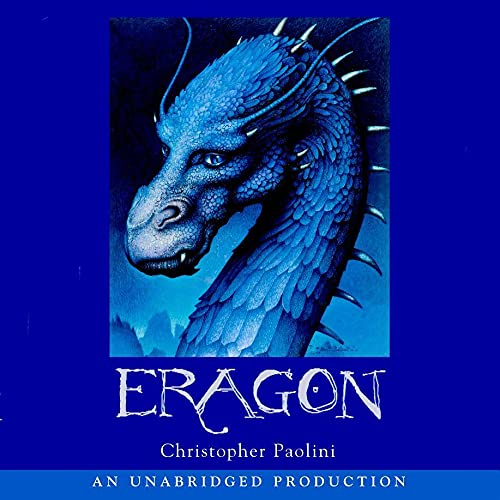

In [74]:
img = Image.fromarray(df['ImageArray'][3])
img

Cross-checking the images are mapped correctly to the titles

In [75]:
df.isnull().values.any()
df.isnull().sum()

,0
index,0
bookID,0
title,0
genre,0
Age,0
ISBN,0
ImageArray,12


Checking for null values

In [76]:
df[df.isnull().any(axis=1)]

,index,bookID,title,genre,Age,ISBN,ImageArray
10,11,12,The House Of Hades,Young Adult,9 - 16,9788711347089,NaN
15,17,18,The book thief,Historical Fiction,12 and above,9780307433848,NaN
18,21,22,it starts with us,Romance,15 and above,9781668001233,NaN
19,22,23,verity,Thriller,12 and above,9781538724743,NaN
20,23,24,the last fight,Thriller,13 and above,9781507650684,NaN
21,24,25,stranger in the woods,Biography & Autobiography,12 and above,9781101911532,NaN
23,26,27,honeymoon for one,Romance,15 and above,9781838890759,NaN
24,28,29,the boys from biloxi,Thiller,16 and above,9780385548922,NaN
25,29,30,fire and blood,Fantasy,17 and above,9781524796280,NaN
26,30,31,atomic habits,Psychology,18 and above,9781804220207,NaN


Viewing all the null values in the dataset

In [77]:
df = df.dropna() # drop the NAN or empty value columns

In [78]:
df.isnull().values.any()
df.isnull().sum()

,0
index,0
bookID,0
title,0
genre,0
Age,0
ISBN,0
ImageArray,0


In [79]:
df.head(5)

,index,bookID,title,genre,Age,ISBN,ImageArray
0,0,1,Hunger games,Young Adult,11- 13,9780545229937,"[[[35, 31, 32], [35, 31, 32], [35, 31, 32], [3..."
1,2,3,To Kill a Mockingbird,Young Adult,12-18,9780060888695,"[[[166, 188, 141], [167, 187, 138], [169, 182,..."
2,3,4,Six of Crows,Fantasy,13 and above,9783426443798,"[[[153, 171, 183], [158, 176, 188], [153, 171,..."
3,4,5,Eragon,Fantasy,13 and above,9781400090686,"[[[0, 0, 156], [0, 0, 156], [0, 0, 156], [0, 0..."
4,5,6,Legend,Young Adult,13 and above,8601419658442,"[[[176, 177, 181], [176, 177, 181], [177, 178,..."


Viewing the dataframe with the image array

In [80]:
boolean = df["title"].is_unique
boolean

True

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 34
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       23 non-null     int64 
 1   bookID      23 non-null     int64 
 2   title       23 non-null     object
 3   genre       23 non-null     object
 4   Age         23 non-null     object
 5   ISBN        23 non-null     object
 6   ImageArray  23 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.4+ KB


In [82]:
df2.head(5)

,index,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year,month
0,0,1,Hunger games,Suzanne Collins,4.30,Eng,374,NaN,188036,10/14/2008,Scholastic Press,2008,10
1,1,2,The Dark Prophecy,Rick Riordan,4.19,Eng,414,88152.0,6161,04/02/2017,Disney-Hyperion,2017,4
2,2,3,To Kill a Mockingbird,Harper Lee,4.27,Eng,336,5448897.0,106217,05/23/2006,Harper Perennial Modern Classics,2006,5
3,3,4,Six of Crows,Leigh Bardugo,4.49,Eng,465,713673.0,79049,09/29/2015,Henry Holt & Company,2015,9
4,4,5,Eragon,Christopher Paolini,3.93,Eng,503,1628072.0,24862,08/26/2002,Paolini LLC,2002,8


In [83]:
df2.isnull().values.any()
df2.isnull().sum()

,0
index,0
bookID,0
title,0
authors,0
average_rating,0
language_code,0
num_pages,0
ratings_count,1
text_reviews_count,0
publication_date,0


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               40 non-null     int64  
 1   bookID              40 non-null     int64  
 2   title               40 non-null     object 
 3   authors             40 non-null     object 
 4   average_rating      40 non-null     float64
 5   language_code       40 non-null     object 
 6   num_pages           40 non-null     int64  
 7   ratings_count       39 non-null     float64
 8   text_reviews_count  40 non-null     int64  
 9   publication_date    40 non-null     object 
 10  publisher           40 non-null     object 
 11  year                40 non-null     int64  
 12  month               40 non-null     int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 4.2+ KB


In [85]:
df2['authors']

,authors
0,Suzanne Collins
1,Rick Riordan
2,Harper Lee
3,Leigh Bardugo
4,Christopher Paolini
5,Marie Lu
6,Nicola Yoon
7,Robert Galbraith
8,Alexandra Monir
9,Veronica Roth


In [86]:
df2['ratings_count']

,ratings_count
0,NaN
1,88152.0
2,5448897.0
3,713673.0
4,1628072.0
5,487822.0
6,283269.0
7,245321.0
8,5762.0
9,79608.0


In [87]:
df2['ratings_count'] = pd.to_numeric(df2['ratings_count'], errors='coerce').astype('Int64')

In [88]:
df2.describe()

,index,bookID,average_rating,num_pages,ratings_count,text_reviews_count,year,month
count,40.000000,40.000000,40.000000,40.000000,39.0,40.000000,40.000000,40.000000
mean,19.500000,20.500000,4.217250,415.075000,585561.564103,25308.950000,2006.450000,7.050000
std,11.690452,11.690452,0.331809,135.665196,1052085.948094,40191.568953,34.250173,3.411519
min,0.000000,1.000000,3.590000,168.000000,51.0,7.000000,1844.000000,1.000000
25%,9.750000,10.750000,4.000000,326.250000,9882.5,260.750000,2007.750000,4.000000
50%,19.500000,20.500000,4.175000,394.000000,111091.0,7539.500000,2016.500000,8.000000
75%,29.250000,30.250000,4.500000,500.750000,664196.5,27821.250000,2018.250000,10.000000
max,39.000000,40.000000,4.900000,736.000000,5448897.0,188036.000000,2022.000000,14.000000


In [90]:
df2_numeric = df2.select_dtypes(include=[float, int])
corr = df2_numeric.corr()
print(corr)

                       index    bookID  average_rating  num_pages  \
index               1.000000  1.000000        0.346805  -0.003209   
bookID              1.000000  1.000000        0.346805  -0.003209   
average_rating      0.346805  0.346805        1.000000   0.083168   
num_pages          -0.003209 -0.003209        0.083168   1.000000   
ratings_count      -0.342675 -0.342675       -0.017786  -0.119006   
text_reviews_count -0.506510 -0.506510        0.013334  -0.019286   
year               -0.039832 -0.039832        0.107147  -0.163078   
month               0.207663  0.207663        0.132183  -0.207098   

                    ratings_count  text_reviews_count      year     month  
index                   -0.342675           -0.506510 -0.039832  0.207663  
bookID                  -0.342675           -0.506510 -0.039832  0.207663  
average_rating          -0.017786            0.013334  0.107147  0.132183  
num_pages               -0.119006           -0.019286 -0.163078 -0.207098 

In [91]:
df2['publisher'].value_counts()

,count
publisher,
Scribner,3
Henry Holt & Company,2
Atria Books,2
Scholastic Press,1
Bantam Books,1
Higher Bank Books,1
Knopf Doubleday Publishing Group,1
The Last Bureau,1
Boldwood Books,1


In [92]:
df2['average_rating'].describe()

,average_rating
count,40.000000
mean,4.217250
std,0.331809
min,3.590000
25%,4.000000
50%,4.175000
75%,4.500000
max,4.900000


In [93]:
df2['ratings_count'].describe()

,ratings_count
count,39.0
mean,585561.564103
std,1052085.948094
min,51.0
25%,9882.5
50%,111091.0
75%,664196.5
max,5448897.0


Rating Distribution

<ipython-input-94-505ea08de9de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['average_rating'], bins=30)


<Axes: xlabel='average_rating', ylabel='Density'>

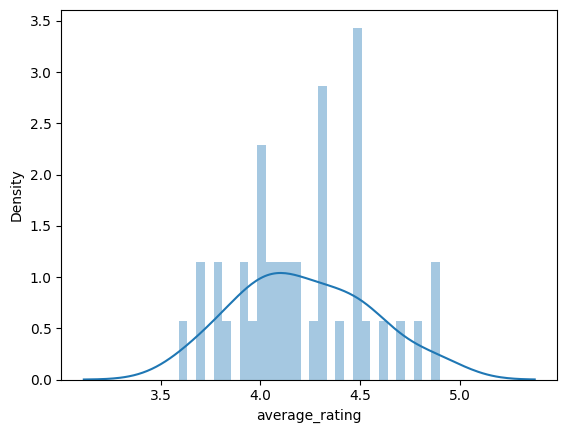

In [94]:
sns.distplot(df2['average_rating'], bins=30)

majority of ratings are in the range of 3.9-4.3

Distribution plot for number of pages(books)

<ipython-input-95-580d66bf8d7e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['num_pages'],bins = 30)


<Axes: xlabel='num_pages', ylabel='Density'>

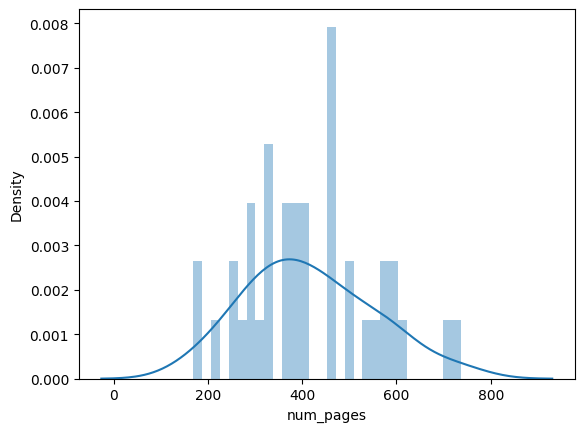

In [95]:
sns.distplot(df2['num_pages'],bins = 30)

majority of number of pages count in under 600
highesy number of pages is near 700

In [96]:
df.columns

Index(['index', 'bookID', 'title', 'genre', 'Age', 'ISBN', 'ImageArray'], dtype='object')

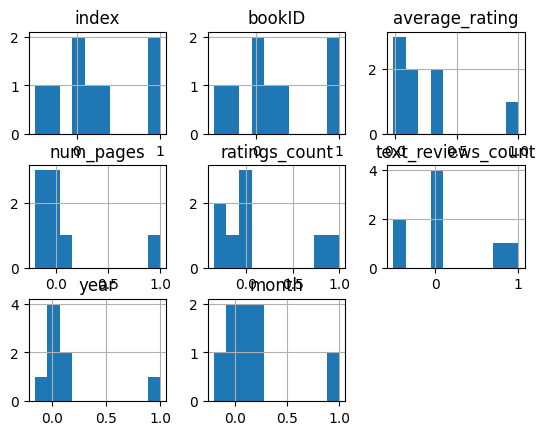

In [97]:
hisogram = corr.hist()

In [107]:
!django-admin startproject myproject
!cd myproject && python3 manage.py startapp books

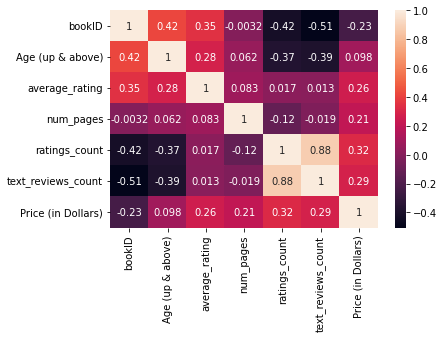

In [ ]:
sns.heatmap(corr, annot = True)

Top 15 Book Publisher

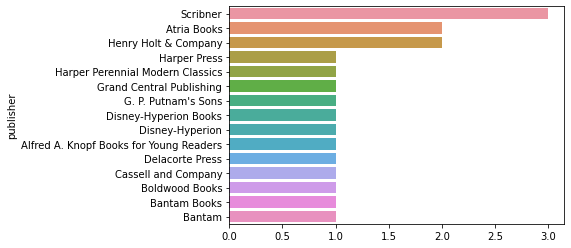

In [ ]:
# Top 20 Publisher
publisher = df2.value_counts('publisher').sort_values(ascending=False).head(15)
sns.barplot(y=publisher.index,x = publisher)

occurance of books

Text(0, 0.5, 'Books')

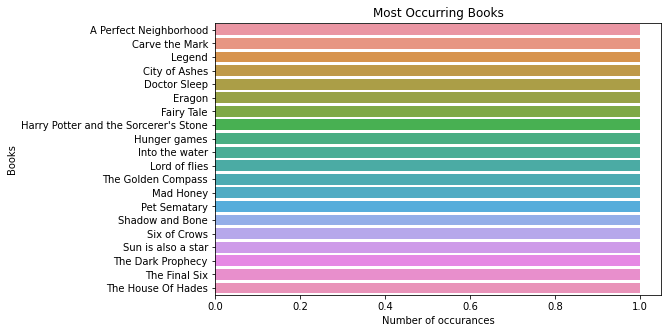

In [ ]:
plt.figure(figsize = (8,5))
title = df2.value_counts('title').sort_values(ascending=False).head(20)
sns.barplot(y=title.index,x=title)
plt.title('Most Occurring Books')
plt.xlabel("Number of occurances")
plt.ylabel('Books')

occurence of authors

Text(0, 0.5, 'authors')

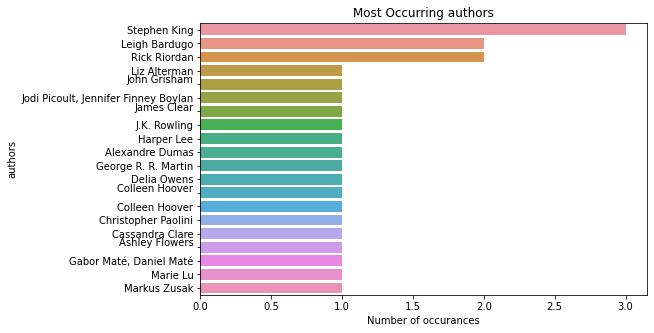

In [ ]:
plt.figure(figsize = (8,5))
title = df2.value_counts('authors').sort_values(ascending=False).head(20)
sns.barplot(y=title.index,x=title)
plt.title('Most Occurring authors')
plt.xlabel("Number of occurances")
plt.ylabel('authors')

Top 10 highest page count book

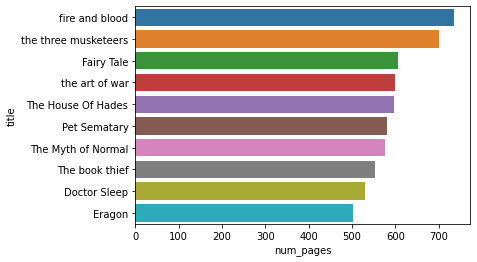

In [ ]:
x = df2.loc[:,['title', 'num_pages']].sort_values(by=['num_pages'],ascending = False).head(10)
sns.barplot(y = 'title',x='num_pages',data = x)

we can see that the highest count is 700 pages for fire and blood book followed by the three musketeers

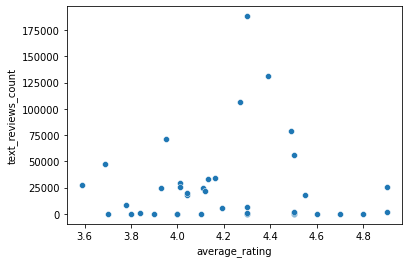

In [ ]:
sns.scatterplot(y='text_reviews_count',x='average_rating',data=df2)

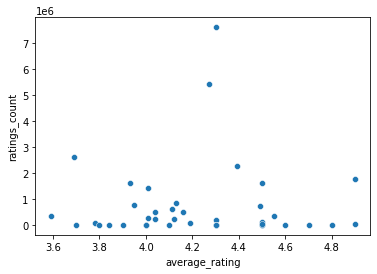

In [ ]:
sns.scatterplot(y='ratings_count',x='average_rating',data=df2)

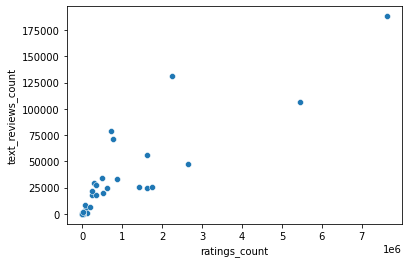

In [ ]:
sns.scatterplot(x='ratings_count',y='text_reviews_count',data=df2)

can see some relation between rating count and text review count

Plot between Price and Rating count:

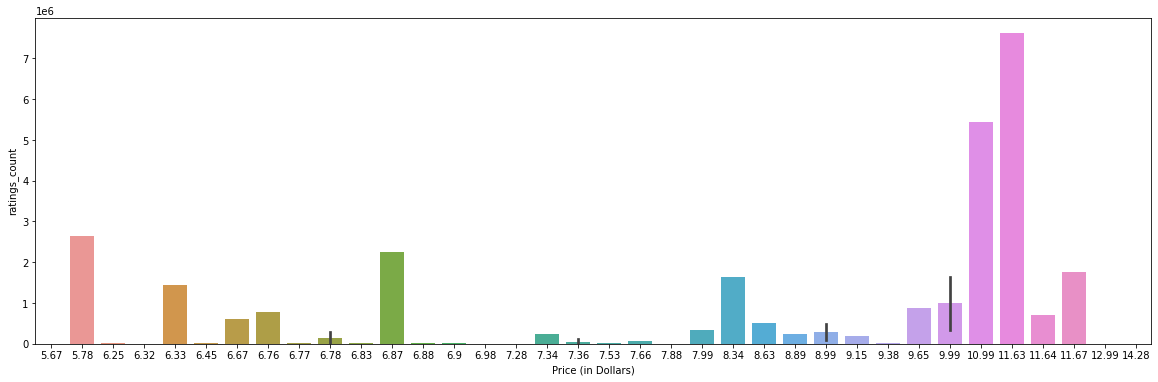

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='Price (in Dollars)',y='ratings_count',data=df2)

How number of pages affects the price of the book:

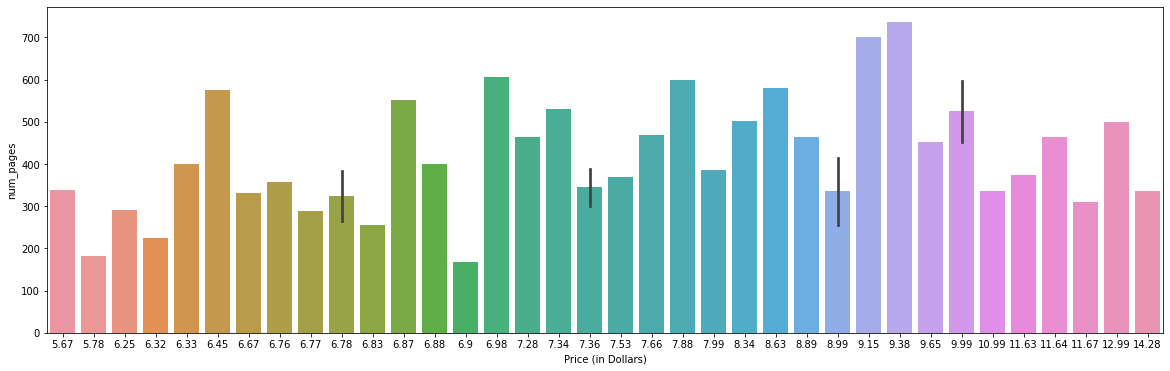

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='Price (in Dollars)',y='num_pages',data=df2)

Genre vs Price:

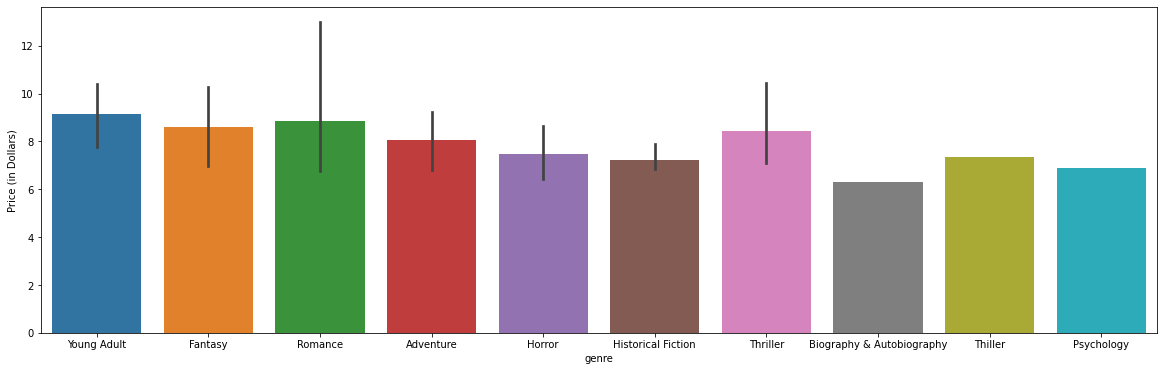

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(y='Price (in Dollars)',x='genre',data=df2)

Price range based on the type of Genre being picked up

Genre VS Age:

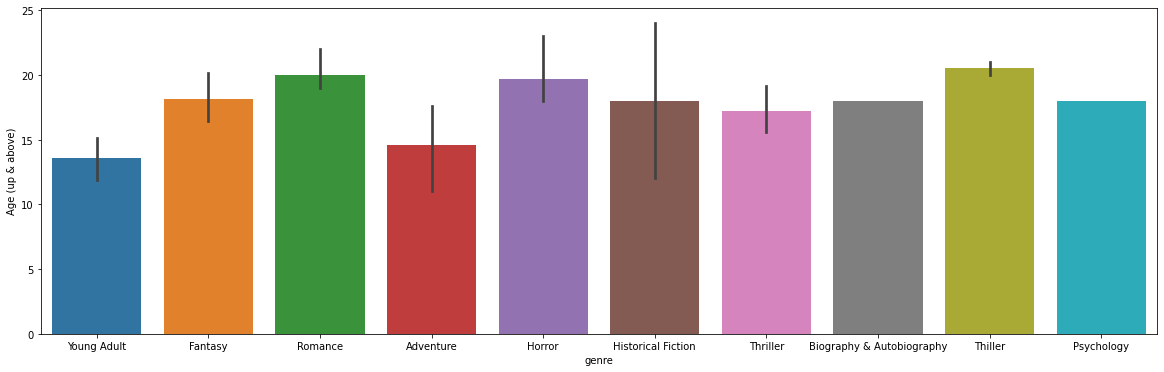

In [ ]:
plt.figure(figsize = (20,6))
sns.barplot(x='genre',y='Age (up & above)',data=df2)

Price of book based on author:

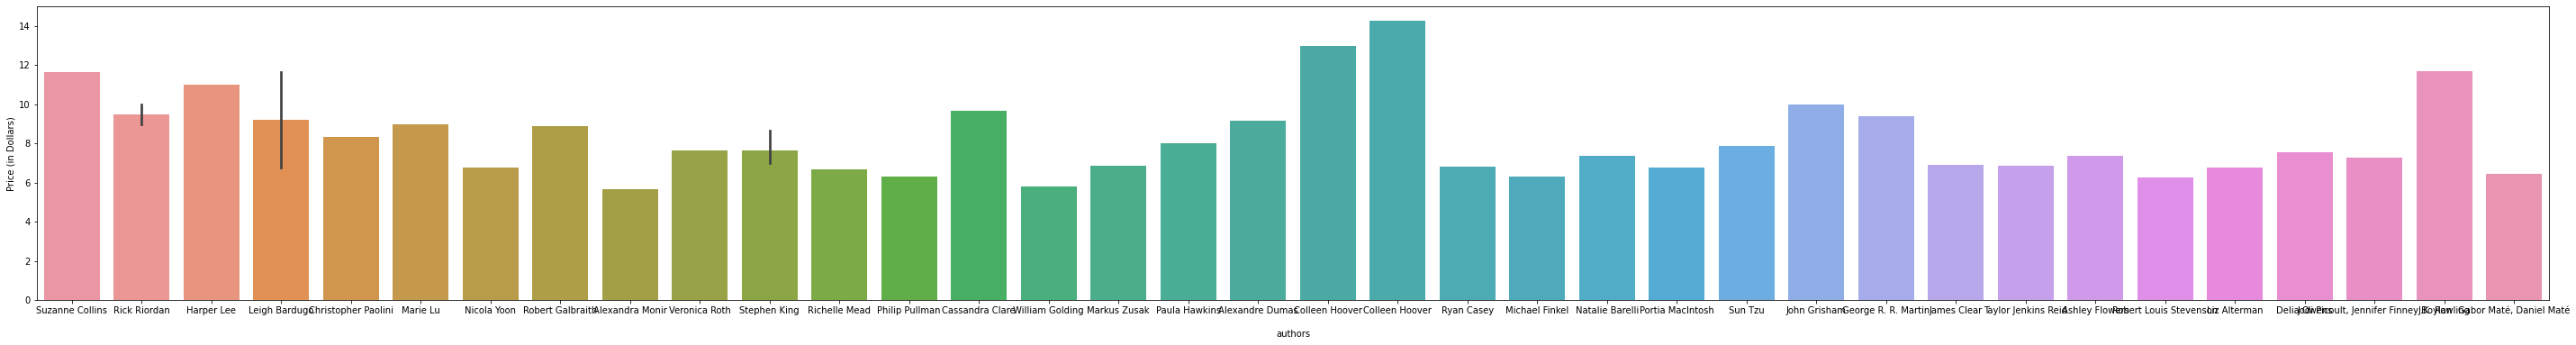

In [ ]:
plt.figure(figsize = (50,6))
sns.barplot(y='Price (in Dollars)',x='authors',data=df2)

Price of book based on publishing house

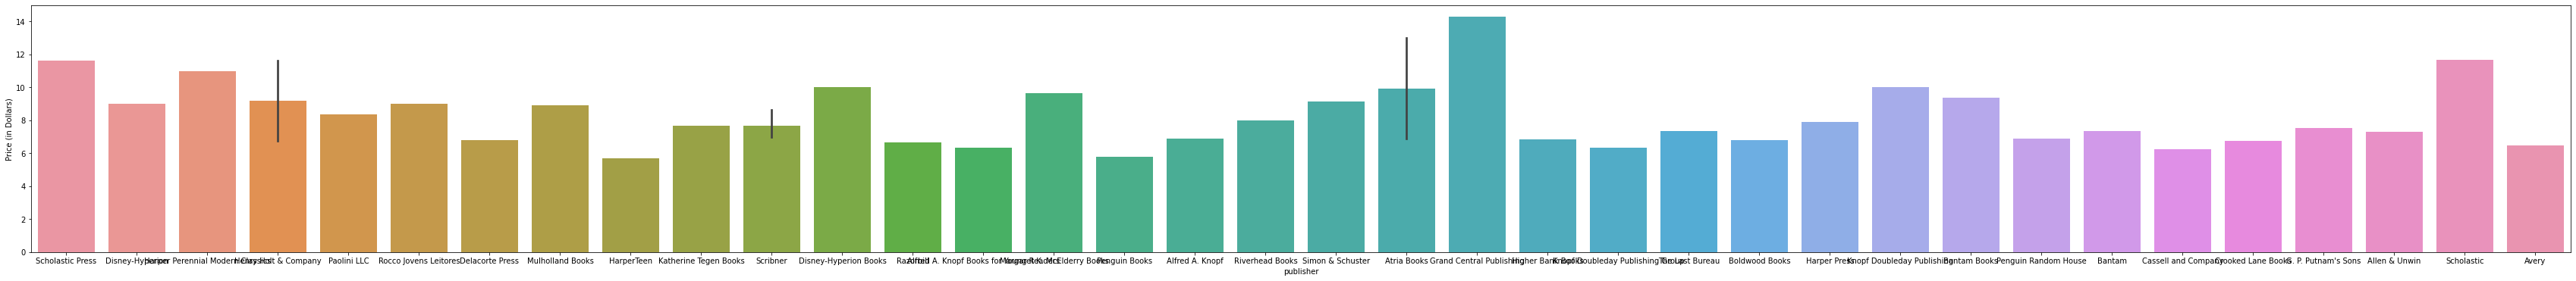

In [ ]:
plt.figure(figsize = (60,6))
sns.barplot(y='Price (in Dollars)',x='publisher',data=df2)

Bubble plot to show the correlation between author and genre

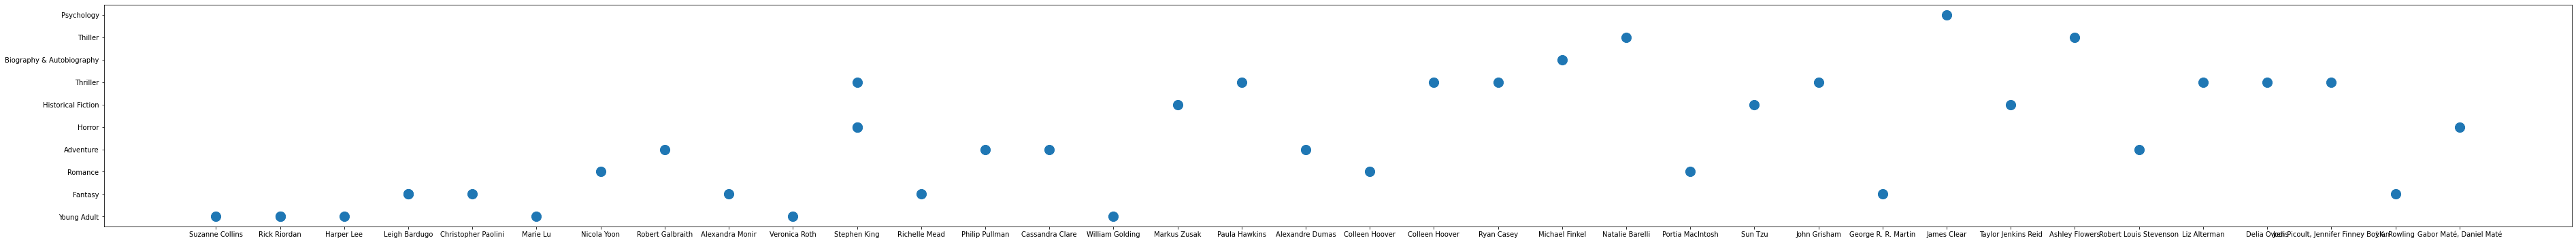

In [ ]:
plt.figure(figsize = (65,6))
plt.scatter(y='genre',x='authors', s = 200 ,data=df2)

TOP 10 Books

In [ ]:
df2.sort_values('average_rating',ascending = False).head(10)

In [ ]:
mean = df2['average_rating'].mean()
print("The mean or average rating for the dataset is : {0}\n".format(mean))
for index, row in df2.iterrows():
  if row['average_rating'] > mean:
    print("The title : {0}  - rating: {1} ".format(row['title'].strip(),row['average_rating']))

Gives a list of all the books whose ratings are above the average book rating across the entire dataset.

This would give us a list of good books.

In which year, highest books published.?

In [ ]:
months=[]
days=[]
year=[]
for i in df2['publication_date']:
    year.append(i.split('/')[2])
    months.append(i.split('/')[0])

df2['year'] = year
df2['month'] = months

In [ ]:
plt.figure(figsize = (10,5))
year = df2['year'].value_counts().head(10)
year
sns.barplot(y=year.index,x=year)

in the year 2022 majority of books were published

In [ ]:
plt.figure(figsize = (10,5))
month = df2['month'].value_counts().head(10)

sns.barplot(y=month.index,x=month)

in october month majority of books were published

*Top* Authors

In [ ]:
x = df2.groupby('authors')['title'].count().reset_index().sort_values('title',ascending = False)
x.head(3)